In [2]:
import os
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/content/spam_ham_dataset.csv')

In [7]:
df.head()

df = df.drop(['Unnamed: 0'], axis=1)
df.head()
print('Total %s data email'% len(df))

#total class memebers
df['label'].value_counts()

Total 5171 data email


ham     3672
spam    1499
Name: label, dtype: int64

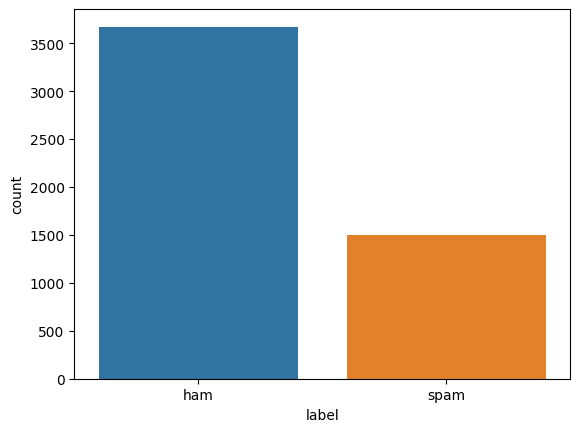

In [9]:
df_label = sns.countplot(data=df, x='label')
plt.show()

In [10]:
#data preprocessing
#data text cleaning
# punchuations
punct = []
for char in string.punctuation:
    punct.append(char)

    import re

def cleaning(txt):
    # case folding
    text = txt.lower()

    # remove multiple space, tabs, dan newlines
    text = re.sub('\s+',' ',text)
    # remove links
    text = text.replace("http://", " ").replace("https://", " ")
    # remove special characters
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove punctuation
    text = ''.join([word for word in text if word not in punct])
    #remove single character
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    #remove numbers
    text = re.sub(r"\d+", "", text)
    #remove multiple spaces (again)
    text = re.sub('\s+',' ',text)
    return text

In [16]:
# Import the necessary libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Function for cleaning text
def cleaning(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # Remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # Convert to lowercase
    words = [word.lower() for word in words]
    return ' '.join(words)

# Apply the cleaning function to 'text' column
df['text_cleaned'] = df['text'].apply(cleaning)

# Remove stop words
stop = set(stopwords.words('english'))
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

# Lemmatize the text
lemmatizer = WordNetLemmatizer()
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Reorder the columns in the DataFrame
df = df[['text', 'text_cleaned', 'label']]

# Display the first few rows of the DataFrame
print(df.head())

# Compare the original text and the cleaned text
print(df['text'][0])
print(df['text_cleaned'][0])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                text  \
0  Subject: enron methanol ; meter # : 988291\r\n...   
1  Subject: hpl nom for january 9 , 2001\r\n( see...   
2  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3  Subject: photoshop , windows , office . cheap ...   
4  Subject: re : indian springs\r\nthis deal is t...   

                                        text_cleaned label  
0  subject enron methanol meter follow note gave ...   ham  
1  subject hpl nom january see attached file hpln...   ham  
2  subject neon retreat ho ho ho around wonderful...   ham  
3  subject photoshop window office cheap main tre...  spam  
4  subject indian spring deal book teco pvr reven...   ham  
Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap

In [19]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from time import time

# Assuming you have defined the cleaning function and cleaned the data

# Lemmatization function
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def do_lemma(string):
    lemmatized = ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in nltk.word_tokenize(string)])
    return lemmatized

# Applying lemmatization to the cleaned text
# Assuming you have defined the cleaning function and lemmatization process

# Apply the cleaning function to the 'text' column
df['text_cleaned'] = df['text'].apply(cleaning)

# Apply lemmatization to the 'text_cleaned' column
df['text_cleaned'] = df['text_cleaned'].apply(do_lemma)


# Renaming columns
df = df.drop(['text'], axis=1)
df = df.rename(columns={'text_cleaned': 'text'})

# Defining 'y'
y = df['label']

# Vectorizing text data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the classifier
clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Training the classifier and measuring the time
t0 = time()
clf.fit(X_train, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")

# Predicting on the test set and measuring the time
t1 = time()
pred = clf.predict(X_test)
print("Predicting time:", round(time()-t1, 3), "s\n")

# Calculating and printing the accuracy of the algorithm
print("Accuracy of KNN Algorithm: ", accuracy_score(pred, y_test))



Training time: 0.006 s

Predicting time: 16.727 s

Accuracy of KNN Algorithm:  0.961352657004831
